In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automatic-question-tagging-system-data/preprocessed Automatic Question Tagging System data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import warnings
import pickle
import time
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans

import logging
from scipy.sparse import hstack
warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("/kaggle/input/automatic-question-tagging-system-data/preprocessed Automatic Question Tagging System data",encoding="ISO-8859-1")


In [4]:
data

,Title,Body,Tags
0,good branch merg tutori tortoisesvn,realli good tutori explain branch merg apach s...,['svn']
1,asp.net site map,anyon got experi creat sqlbase asp.net sitemap...,['sql']
2,function creat color wheel,someth pseudosolv mani time never quit found s...,['algorithm']
3,ad script function .net applic,littl game written c use databas backend trade...,['c#']
4,use nest class case,work collect class use video playback record o...,['c++']
...,...,...,...
80388,way use itertool python clean nest iter,let say follow code 123 b 246 c 357 j b k c pr...,['python']
80389,cmfcmenubutton properli repaint toggl high con...,c++ mfc project use cmfcmenubutton use msvc 20...,['c++']
80390,result data return void get broken,work project huge legaci code base tri redesig...,['c++']
80391,need extend firebaseinstanceidservic subscrib ...,want manag topic subscript client android app ...,['android']


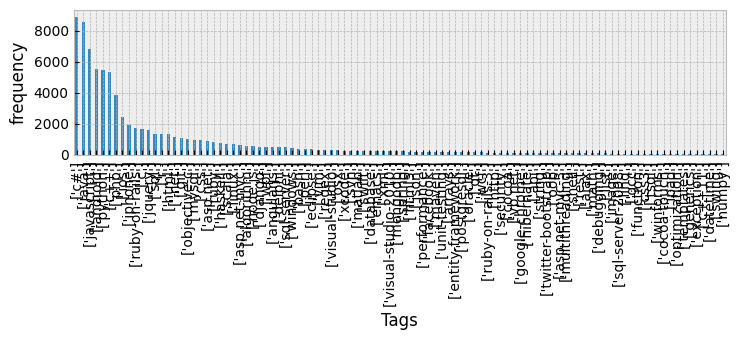

In [4]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
data['Tags'].value_counts().plot(ax=ax, kind='bar', xlabel='Tags', ylabel='frequency')
plt.show()


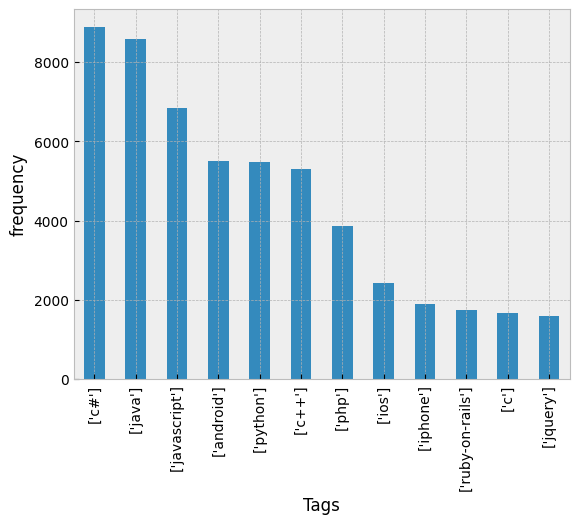

In [3]:

# get the count of each tag
tags_counts = data['Tags'].value_counts()

# filter tags that appear more than 2000 times
tags_counts = tags_counts[tags_counts > 1500]

# create a bar plot of the filtered tag counts
ax = tags_counts.plot(kind='bar', xlabel='Tags', ylabel='frequency')

# display the plot
plt.show()

In [3]:
# get the count of each tag
tags_counts = data['Tags'].value_counts()

# filter tags that appear more than 2000 times
tags = tags_counts[tags_counts > 2000].index.tolist()

# keep only rows with filtered tags
filtered_data = data[data['Tags'].isin(tags)]

In [4]:
filtered_data['Tags'].nunique()

8

In [5]:
filtered_data['Tags'].value_counts()

['c#']            8889
['java']          8578
['javascript']    6841
['android']       5495
['python']        5491
['c++']           5300
['php']           3875
['ios']           2433
Name: Tags, dtype: int64

In [7]:
filtered_data

,Title,Body,Tags
3,ad script function .net applic,littl game written c use databas backend trade...,1
4,use nest class case,work collect class use video playback record o...,2
7,automat updat version number,would like version properti applic increment b...,1
9,connect databas loop recordset c#,simplest way connect queri databas set record c#,1
10,get valu built encod viewstat,need grab base64encod represent viewstat obvio...,1
...,...,...,...
80387,use dict subset datafram,say given datafram column categor data datahea...,7
80388,way use itertool python clean nest iter,let say follow code 123 b 246 c 357 j b k c pr...,7
80389,cmfcmenubutton properli repaint toggl high con...,c++ mfc project use cmfcmenubutton use msvc 20...,2
80390,result data return void get broken,work project huge legaci code base tri redesig...,2


In [10]:
# Encode the labels to numeric values
label_encoder = LabelEncoder()
filtered_data['Tags'] = label_encoder.fit_transform(filtered_data['Tags'])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(filtered_data['Body'].apply(lambda x: np.str_(x)), filtered_data['Tags'], test_size=0.2, random_state=42,shuffle=True)

# Vectorize the text using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), stop_words='english')
x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
x_test_vectorized = vectorizer.transform(x_test).toarray()

In [11]:
# Define the neural network architecture
input_layer = Input(shape=(x_train_vectorized.shape[1],))
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(64, activation='relu')(dropout_layer)
output_layer = Dense(len(set(y_train)), activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 128)               2560128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 12)                780       
                                                                 
Total params: 2,569,164
Trainable params: 2,569,164
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x_train_vectorized, y_train,validation_split=0.2, epochs=2, batch_size=64)


Epoch 1/2
538/538 [==============================] - 9s 10ms/step - loss: 1.2294 - accuracy: 0.6183 - val_loss: 0.6978 - val_accuracy: 0.7709
Epoch 2/2
538/538 [==============================] - 3s 6ms/step - loss: 0.5209 - accuracy: 0.8282 - val_loss: 0.6650 - val_accuracy: 0.7846


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_vectorized, y_test, verbose=1)
print("Test Accuracy:", accuracy)

# Make predictions on new data
new_text = "This is a good question about text classification for c++ tags."
new_text_vectorized = vectorizer.transform([new_text]).toarray()
predicted_label = model.predict(new_text_vectorized)[0]
predicted_tag = list(y_train.unique())[np.argmax(predicted_label)]
print("Predicted tag:", predicted_tag)


337/337 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.7790
Test Accuracy: 0.779007077217102
1/1 [==============================] - 0s 183ms/step
Predicted tag: 1


In [6]:
# Encode the labels to numeric values
label_encoder = LabelEncoder()
filtered_data['Tags'] = label_encoder.fit_transform(filtered_data['Tags'])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(filtered_data['Body'].apply(lambda x: np.str_(x))+filtered_data['Title'].apply(lambda x: np.str_(x)), filtered_data['Tags'], test_size=0.2, random_state=42,shuffle=True)

# Vectorize the text using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), stop_words='english')
x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
x_test_vectorized = vectorizer.transform(x_test).toarray()

In [8]:
# Define the neural network architecture
input_layer = Input(shape=(x_train_vectorized.shape[1],))
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(64, activation='relu')(dropout_layer)
output_layer = Dense(len(set(y_train)), activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 128)               2560128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 2,568,904
Trainable params: 2,568,904
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train the model with only body
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x_train_vectorized, y_train,validation_split=0.2, epochs=2, batch_size=64)


Epoch 1/2
469/469 [==============================] - 9s 10ms/step - loss: 0.9199 - accuracy: 0.7061 - val_loss: 0.4407 - val_accuracy: 0.8680
Epoch 2/2
469/469 [==============================] - 3s 6ms/step - loss: 0.2969 - accuracy: 0.9138 - val_loss: 0.4312 - val_accuracy: 0.8708


In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_vectorized, y_test, verbose=1)
print("Test Accuracy:", accuracy)

# Make predictions on new data
new_text = "This is a good question about text classification for c++ tags."
new_text_vectorized = vectorizer.transform([new_text]).toarray()
predicted_label = model.predict(new_text_vectorized)[0]
predicted_tag = list(y_train.unique())[np.argmax(predicted_label)]
print("Predicted tag:", predicted_tag)


294/294 [==============================] - 1s 3ms/step - loss: 0.4565 - accuracy: 0.8565
Test Accuracy: 0.8565185070037842
1/1 [==============================] - 0s 184ms/step
Predicted tag: 6


In [15]:
new_text = "This is a good question about text classification for python tags."
new_text_vectorized = vectorizer.transform([new_text]).toarray()
predicted_label = model.predict(new_text_vectorized)[0]
predicted_tag = label_encoder.inverse_transform([np.argmax(predicted_label)])

1/1 [==============================] - 0s 22ms/step


In [16]:
predicted_tag[0]

"['python']"

In [12]:
y_train.value_counts()

1     7139
6     6837
7     5410
10    4420
0     4418
3     4243
9     3097
4     1932
5     1510
11    1406
2     1338
8     1270
Name: Tags, dtype: int64